Activity on titanic dataset

Should Jack have survived?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
titanic = sns. load_dataset('titanic')

In [7]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
titanic.loc[((titanic['survived'] == 0) & (titanic['alive'] == 'yes')) | ((titanic['survived'] == 1) & (titanic['alive'] == 'no'))].shape[0]

0

In [16]:
titanic['sex_encoded'] = titanic['sex'].apply(lambda x : 1 if x == 'male' else 0)


In [8]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [14]:
def embark_code(s) :
    if s == 'S' :
        return 0
    elif s == 'C' :
        return 1
    elif s == 'Q' :
        return 2
    else :
        return 0

titanic['embarked_encoded'] = titanic['embarked'].apply(embark_code)

In [13]:
titanic['alone_encoded'] = titanic['alone'].apply(lambda x : 1 if x else 0)

In [17]:
X = titanic.loc[titanic['age'].notna(), ['pclass', 'age', 'sex_encoded', 'embarked_encoded', 'fare', 'alone_encoded']]
y = titanic.loc[titanic['age'].notna(), 'survived']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

c:\Users\anato\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\anato\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

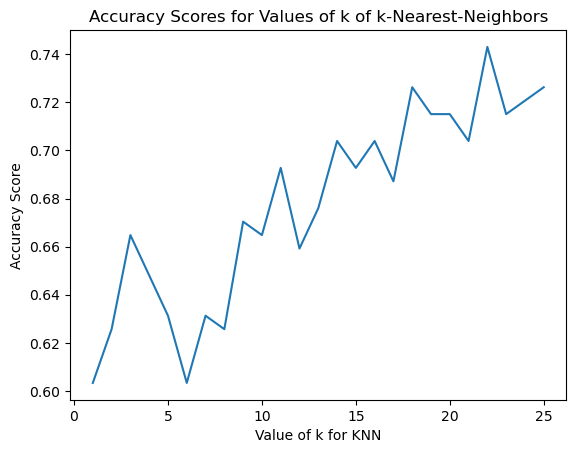

In [20]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [32]:
jack = pd.DataFrame(columns = ['pclass', 'age', 'sex_encoded', 'embarked_encoded', 'fare', 'alone_encoded'], data = [[3, 20, 1, 0, 7.25, 0]])

In [33]:
knn25 = KNeighborsClassifier(n_neighbors=25)
knn25.fit(x_train, y_train)
knn.predict(jack)

c:\Users\anato\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0], dtype=int64)

In [44]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 17)
tree.fit(x_train,y_train)
prediction=tree.predict(x_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.782


In [38]:
tree.predict(jack)

array([0], dtype=int64)

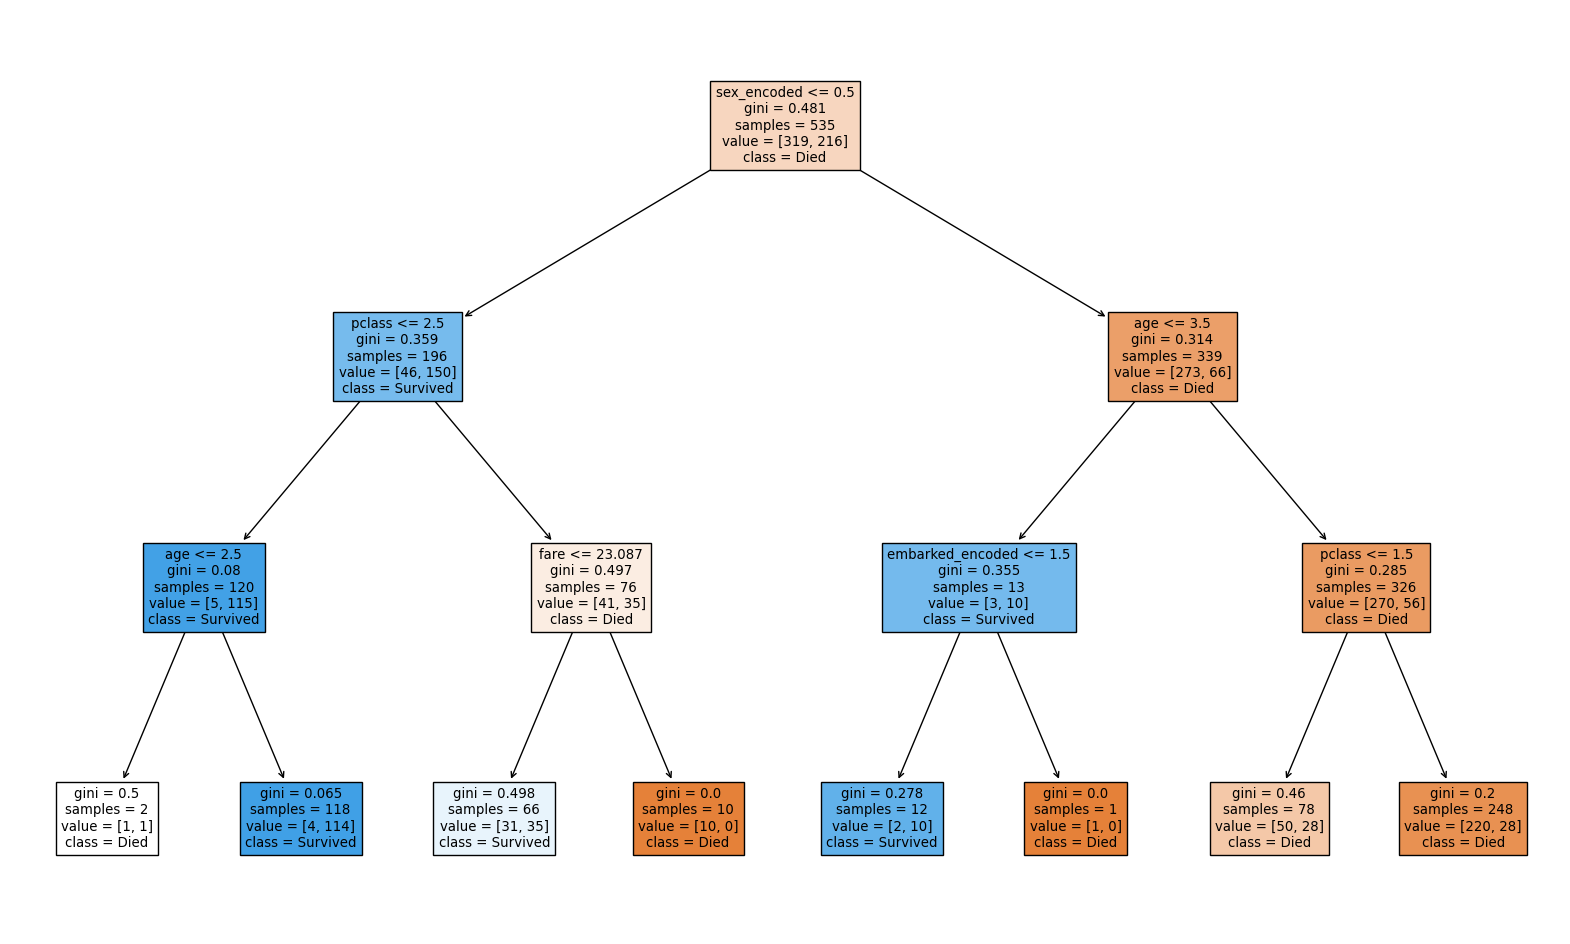

In [45]:
plt.figure(figsize = (20,12))
fn = ['pclass', 'age', 'sex_encoded', 'embarked_encoded', 'fare', 'alone_encoded']
cn = ['Died', 'Survived']
plot_tree(tree, feature_names = fn, class_names = cn, filled = True);

In [41]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')

The accuracy of the Random Forest Classifier is: 76.53631284916202 %


In [35]:
rfc.predict(jack)

array([0], dtype=int64)

In [29]:
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [30]:
print('The accuracy of the Logistic Regression is:', lr.score(x_test, y_test) * 100, '%')

The accuracy of the Logistic Regression is: 77.6536312849162 %


In [36]:
lr.predict(jack)

array([0], dtype=int64)

Let's try to work with tpot

In [46]:
pip install tpot


     ---------------------------------------- 87.2/87.2 kB 4.8 MB/s eta 0:00:00
     -------------------------------------- 114.3/114.3 kB 6.5 MB/s eta 0:00:00
     --------------------------------------- 89.1/89.1 MB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=ab84663ed6430fb099a12b847840d6a02799e0ed3174f4a2099d022bd86ae831
  Stored in directory: c:\users\anato\appdata\local\pip\cache\wheels\48\8c\93\3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [49]:
import tpot
from tpot import TPOTClassifier

In [51]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=30, cv=5, random_state=34, verbosity=2)

In [52]:
pipeline_optimizer.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/180 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8224299065420562

Generation 2 - Current best internal CV score: 0.8224299065420562

Generation 3 - Current best internal CV score: 0.8224299065420562

Generation 4 - Current best internal CV score: 0.8242990654205608

Generation 5 - Current best internal CV score: 0.8242990654205608

Best pipeline: LinearSVC(ExtraTreesClassifier(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, criterion=entropy, max_features=0.6000000000000001, min_samples_leaf=18, min_samples_split=10, n_estimators=100), C=20.0, dual=False, loss=squared_hinge, penalty=l1, tol=0.001)


TPOTClassifier(generations=5, population_size=30, random_state=34, verbosity=2)

In [53]:
print(pipeline_optimizer.score(x_test, y_test))

0.7821229050279329
